In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
# Load the Datafrom CSV
df=pd.read_csv("/home/sathish/Downloads/advertising.csv")

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
import statsmodels.api as sm

In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
x=df['TV']
y=df['Sales']

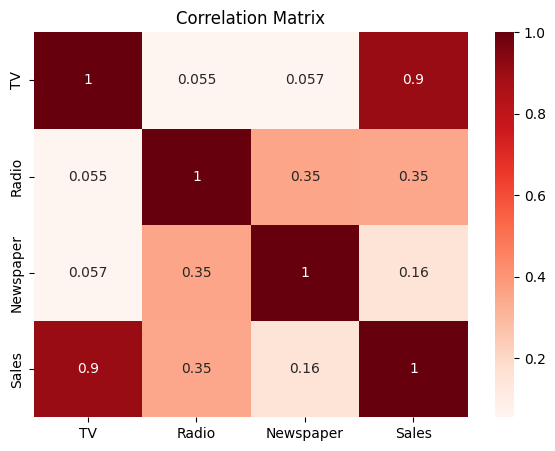

In [11]:
correlation_matrix=df.corr()
plt.figure(figsize=(7,5))
sns.heatmap(correlation_matrix,annot=True, cmap='Reds')
plt.title("Correlation Matrix")
plt.show()

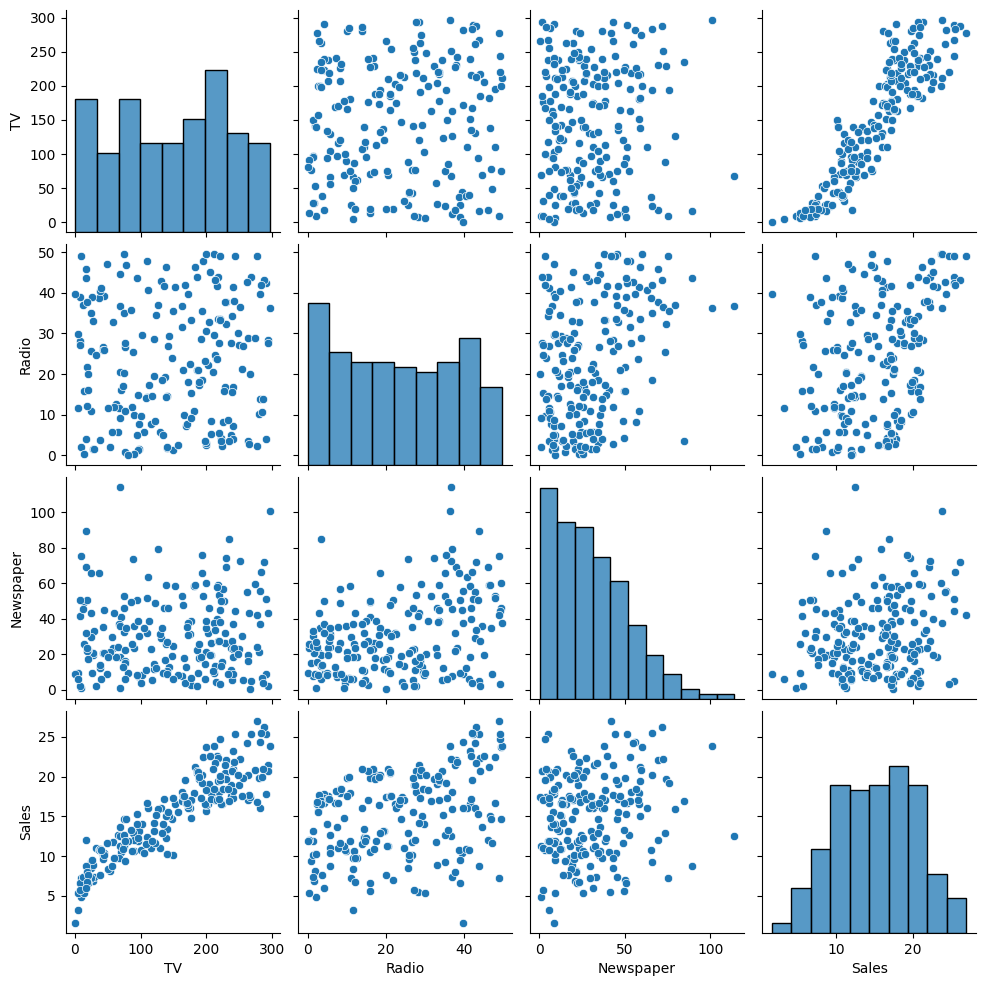

In [12]:
sns.pairplot(df)

In [13]:
from sklearn.model_selection import train_test_split
# splitting the dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [14]:
x_train

79     116.0
197    177.0
38      43.1
24      62.3
122    224.0
       ...  
106     25.0
14     204.1
92     217.7
179    165.6
102    280.2
Name: TV, Length: 160, dtype: float64

In [15]:
y_train

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
       ... 
106     7.2
14     19.0
92     19.4
179    17.6
102    19.8
Name: Sales, Length: 160, dtype: float64

In [16]:
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm).fit()

In [17]:
lr.params

const    7.007108
TV       0.055483
dtype: float64

In [18]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     689.1
Date:                Fri, 02 Aug 2024   Prob (F-statistic):           1.71e-59
Time:                        18:52:02   Log-Likelihood:                -355.76
No. Observations:                 160   AIC:                             715.5
Df Residuals:                     158   BIC:                             721.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0071      0.364     19.274      0.0

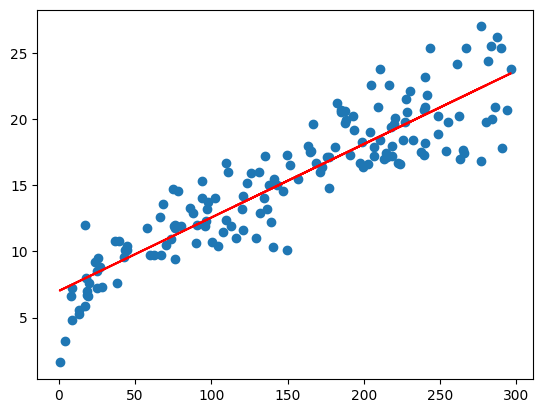

In [19]:
y_pred=7.0071+0.0555*x_train
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred,'r')
plt.show()

In [20]:
y_train_pred=lr.predict(x_train_sm)
res=(y_train-y_train_pred)

/tmp/ipykernel_3347/3920522914.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res,bins=15)


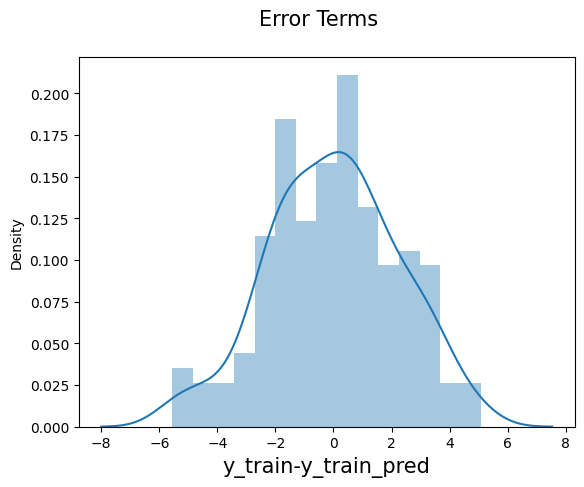

In [21]:
fig=plt.figure()
sns.distplot(res,bins=15)
fig.suptitle('Error Terms',fontsize=15)
plt.xlabel('y_train-y_train_pred',fontsize=15)
plt.show()

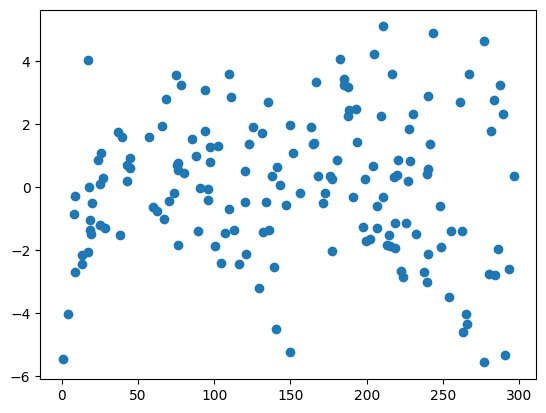

In [22]:
plt.scatter(x_train,res)
plt.show()

In [23]:
x_test_sm=sm.add_constant(x_test)
y_pred=lr.predict(x_test_sm)

In [24]:
y_pred.head()

95     16.067473
15     17.848476
30     23.258063
158     7.656259
128    19.230001
dtype: float64

In [25]:
import numpy as np

In [26]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.470035001123256

In [27]:
r_squared=r2_score(y_test,y_pred)
r_squared

0.802561303423698

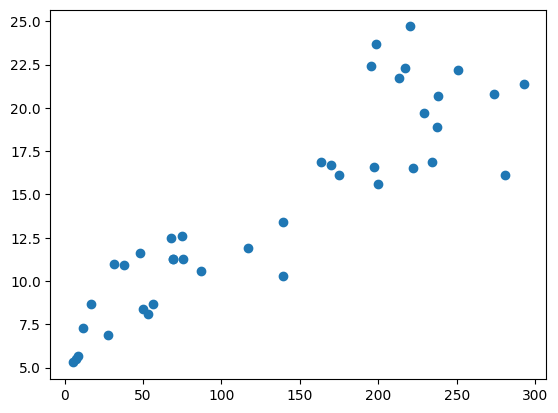

In [28]:
plt.scatter(x_test,y_test)

In [29]:
x_train_sm.shape

(160, 2)

In [30]:
x_train.shape

(160,)

In [31]:
x_train_lm,x_test_lm,y_train_lm,y_test_lm=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=42)

In [32]:
x_train_lm.shape

(140,)

In [34]:
x_train_lm = x_train_lm.values.reshape(-1,1)
x_test_lm = x_test_lm.values.reshape(-1,1)

In [36]:
print(x_train_lm.shape)
print(y_train_lm.shape)
print(x_test_lm.shape)
print(y_test_lm.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [37]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(x_train_lm,y_train_lm)

LinearRegression()

In [38]:
print(lm.intercept_)
print(lm.coef_)

7.206554548173251
[0.05483488]
